## Largest Overlap of Intervals

Given an array of intervals, determine the maximum number of intervals that overlap at any point. Each interval is half-open, meaning it includes the start point but excludes the end point.

- Example
    - Input: intervals = [[1, 3], [5, 7], [2, 6], [4, 8]]
    - Output: 3

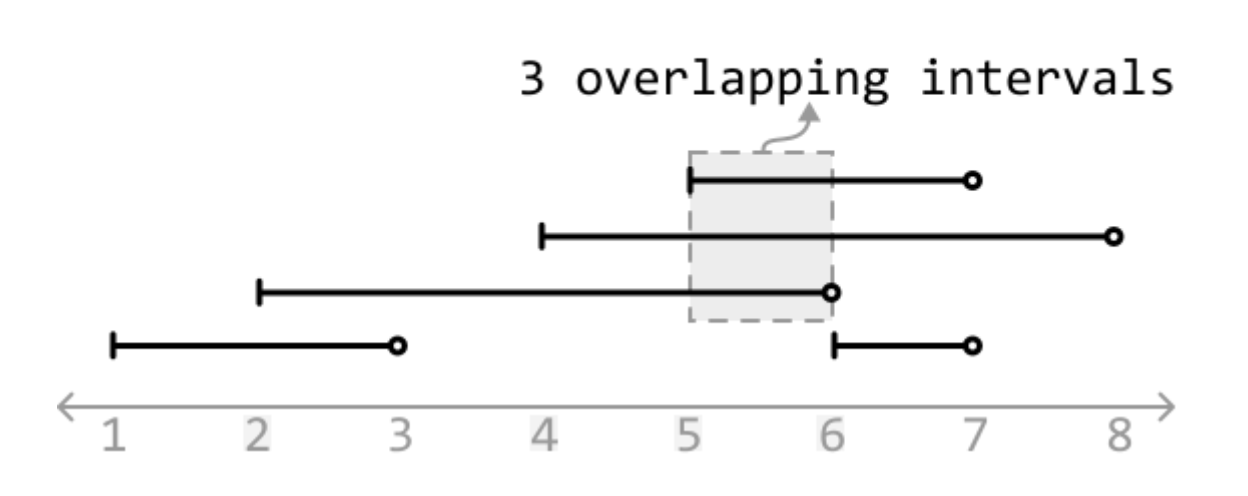

[https://www.youtube.com/watch?v=Fdgxkvivn1s](https://www.youtube.com/watch?v=Fdgxkvivn1s)

**Method #1:** Iterative approach
- Time Complexity: `O(n * log n)`
- Space Complexity: `O(n)`

In [ ]:
def max_overlapping_intervals(intervals):
    # Create events array
    events = []
    for start, end in intervals:
        events.append((start, 1))    # start event
        events.append((end, -1))     # end event
    
    # Sort events by time
    # If times are equal, process end before start
    events.sort(key=lambda x: (x[0], -x[1]))        # REMEMBER
    
    current_overlap = 0
    max_overlap = 0
    
    # Process events in order
    for time, count_change in events:
        current_overlap += count_change
        max_overlap = max(max_overlap, current_overlap)
    
    return max_overlap

In [3]:
intervals = [[1, 3], [5, 7], [2, 6], [4, 8]]
# intervals = [[1, 4], [2, 5], [3, 6], [7, 9]]

In [4]:
max_overlapping_intervals(intervals)

3

```python
events.sort(key=lambda x: (x[0], -x[1]))
```

#### Breaking Down the Sort Key

1. **The Lambda Function**
   - `lambda x: (x[0], -x[1])` creates a tuple of two values for each event
   - `x[0]` is the time of the event
   - `x[1]` is the event type (1 for start, -1 for end)
   - The negative sign in `-x[1]` reverses the order of event types

#### Why This Sorting is Important

Let's look at what happens with an example:
```python
# Example events: [(2, 1), (2, -1)]
# x[0] = 2 (time)
# x[1] = 1 or -1 (event type)
```

When two events happen at the same time:
- End events (-1) will come before start events (1) because:
  - For end event: `-(-1) = 1`
  - For start event: `-(1) = -1`
  - When sorting, -1 comes before 1

#### Why Process End Before Start?

This ordering is crucial because:
1. It prevents overcounting overlaps
2. It handles the case of one interval ending exactly when another begins
3. It maintains the correct count of active intervals

For example, if at time 2:
```
Interval A ends
Interval B starts
```
We want to process the end of A before the start of B to get the correct overlap count.

This sorting strategy ensures accurate counting of overlapping intervals while maintaining the half-open interval property specified in the problem.